In [ ]:
from imageai.Detection import ObjectDetection
import os
import cv2


detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath('resnet50_coco_best_v2.1.0.h5')
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image="1.jpg",
                                             output_image_path="imagenew_1.jpg",
                                             minimum_percentage_probability=30)
num=1
for eachObject in detections:
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")
    img=cv2.imread(r"1.jpg")[:,:]
    if eachObject["box_points"][0]!=None:
        cv2.imwrite(r"%s_%d.png"%(eachObject["name"],num),img[eachObject["box_points"][1]:eachObject["box_points"][3],eachObject["box_points"][0]:eachObject["box_points"][2]])
        num+=1

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img_1=cv2.imread("frisbee_1.png",0)
img_2=cv2.imread("clock_1.png",0)
plt.figure(figsize=(8, 16))
plt.subplot(121)
plt.axis('off')
plt.imshow(img_1,cmap="gray")
plt.subplot(122)
plt.axis('off')
plt.imshow(img_2,cmap="gray")
plt.show()

<Figure size 800x1600 with 2 Axes>

In [2]:
def conv2D(img,kernel):
    [img_w,img_h]=img.shape
    [kernel_w,kernel_h]=kernel.shape
    pad=kernel.shape[0]//2
    img_pad=np.zeros((img_w+pad*2,img_h+pad*2))
    img_pad[pad:img_w+pad,pad:img_h+pad]=img.copy()
    img_out=img.copy()
    for i in range(img_out.shape[0]):
        for j in range(img_out.shape[1]):
                img_out[i][j]=int(np.sum(img_pad[i:i+kernel_w,j:j+kernel_h]*(kernel)))
    return img_out

def gaussian_filter(img,kernel_size,sigma):
    K = np.zeros(kernel_size, dtype=np.float)
    pad_size=kernel_size[0]//2
    for x in range(-pad_size, -pad_size + kernel_size[0]):
        for y in range(-pad_size, -pad_size + kernel_size[1]):
            K[y + pad_size, x + pad_size] = np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    K /= (2 * np.pi * sigma * sigma)
    K /= K.sum()
    img_out=conv2D(img,K)
    return img_out
def sort_filter(img,kernel_size,state="max"):
    [img_w,img_h]=img.shape
    kernel_w,kernel_h=kernel_size
    pad=kernel_size[0]//2
    img_pad=np.zeros((img_w+pad*2,img_h+pad*2))
    if state=="min":
        img_pad+=255
    img_pad[pad:img_w+pad,pad:img_h+pad]=img.copy()
    img_out=img.copy()
    for i in range(img_out.shape[0]):
        for j in range(img_out.shape[1]):
                if state=="max":
                    img_out[i][j]=np.max(img_pad[i:i+kernel_w,j:j+kernel_h])
                if state=="min":
                    img_out[i][j]=np.min(img_pad[i:i+kernel_w,j:j+kernel_h])
                if state=="mid":
                    img_out[i][j]=np.median(img_pad[i:i+kernel_w,j:j+kernel_h])
    return img_out

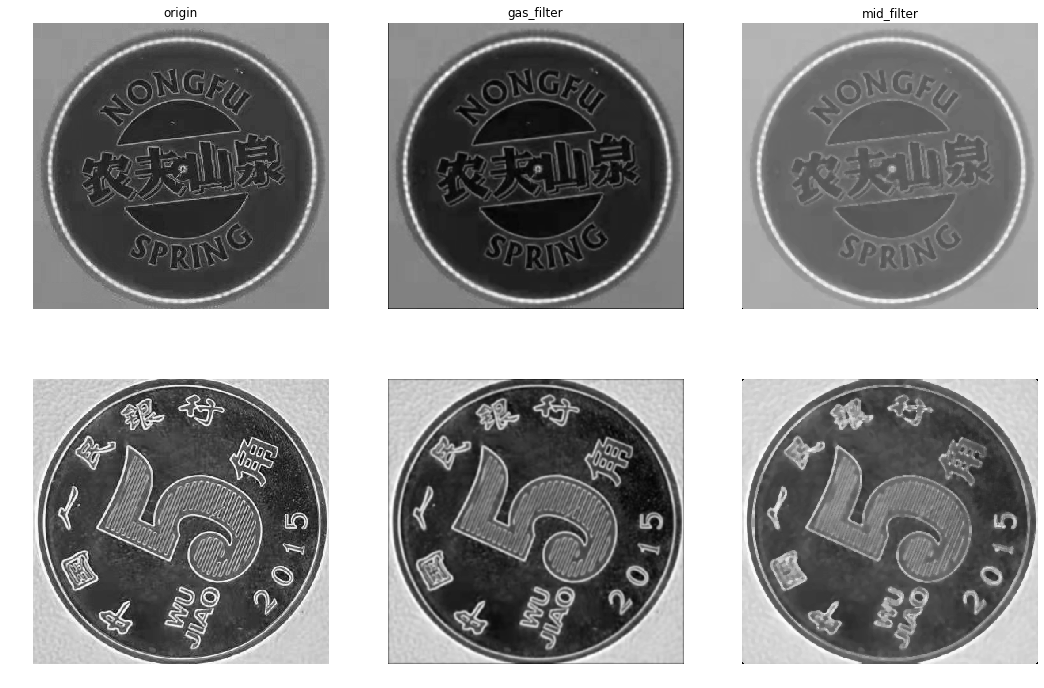

In [3]:
img_1_noise_gas_filter=gaussian_filter(img_1,kernel_size=(5,5),sigma=1)
img_2_noise_gas_filter=gaussian_filter(img_2,kernel_size=(5,5),sigma=1)
img_1_noise_mid_filter=sort_filter(img_1,kernel_size=(5,5),state="mid")
img_2_noise_mid_filter=sort_filter(img_2,kernel_size=(5,5),state="mid")
plt.figure(figsize=(18, 12))
ax=plt.subplot(231)
plt.imshow(img_1,cmap="gray")
plt.axis('off')
ax.set_title("origin")
ax=plt.subplot(234)
plt.imshow(img_2,cmap="gray")
plt.axis('off')
ax=plt.subplot(232)
plt.imshow(img_1_noise_gas_filter,cmap="gray")
plt.axis('off')
ax.set_title("gas_filter")
ax=plt.subplot(235)
plt.imshow(img_2_noise_gas_filter,cmap="gray")
plt.axis('off')
ax=plt.subplot(233)
plt.imshow(img_1_noise_mid_filter,cmap="gray")
plt.axis('off')
ax.set_title("mid_filter")
ax=plt.subplot(236)
plt.imshow(img_2_noise_mid_filter,cmap="gray")
plt.axis('off')
plt.show()

         对比度拉伸   直方图正规化

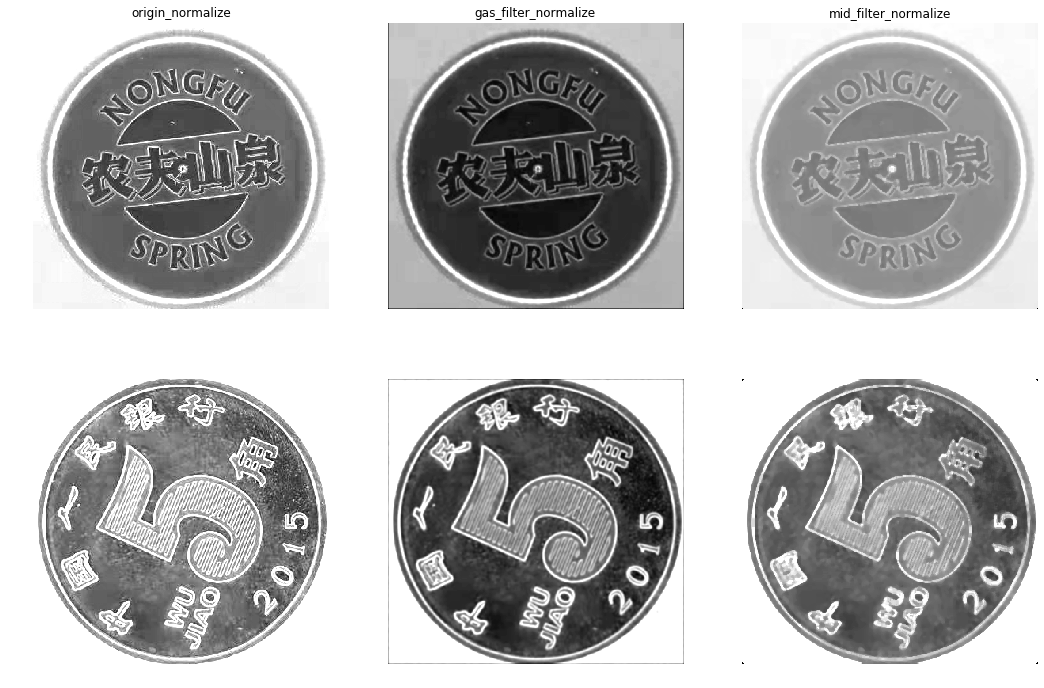

In [11]:
img_1_nor=cv2.normalize(img_1,dst=None,alpha=450,beta=10,norm_type=cv2.NORM_MINMAX)
img_2_nor=cv2.normalize(img_2,dst=None,alpha=450,beta=10,norm_type=cv2.NORM_MINMAX)
img_1_noise_gas_filter_nor=cv2.normalize(img_1_noise_gas_filter,dst=None,alpha=350,beta=10,norm_type=cv2.NORM_MINMAX)
img_2_noise_gas_filter_nor=cv2.normalize(img_2_noise_gas_filter,dst=None,alpha=350,beta=10,norm_type=cv2.NORM_MINMAX)
img_1_noise_mid_filter_nor=cv2.normalize(img_1_noise_mid_filter,dst=None,alpha=350,beta=10,norm_type=cv2.NORM_MINMAX)
img_2_noise_mid_filter_nor=cv2.normalize(img_2_noise_mid_filter,dst=None,alpha=350,beta=10,norm_type=cv2.NORM_MINMAX)
plt.figure(figsize=(18, 12))
ax=plt.subplot(231)
plt.imshow(img_1_nor,cmap="gray")
plt.axis('off')
ax.set_title("origin_normalize")
ax=plt.subplot(234)
plt.imshow(img_2_nor,cmap="gray")
plt.axis('off')
ax=plt.subplot(232)
plt.imshow(img_1_noise_gas_filter_nor,cmap="gray")
plt.axis('off')
ax.set_title("gas_filter_normalize")
ax=plt.subplot(235)
plt.imshow(img_2_noise_gas_filter_nor,cmap="gray")
plt.axis('off')
ax=plt.subplot(233)
plt.imshow(img_1_noise_mid_filter_nor,cmap="gray")
plt.axis('off')
ax.set_title("mid_filter_normalize")
ax=plt.subplot(236)
plt.imshow(img_2_noise_mid_filter_nor,cmap="gray")
plt.axis('off')
plt.show()

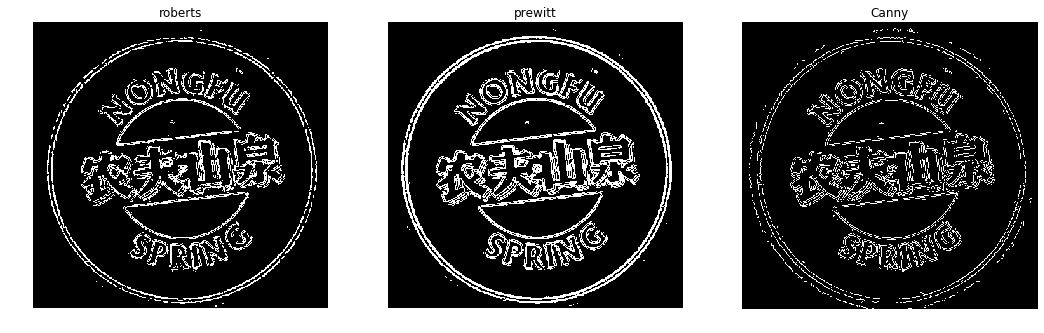

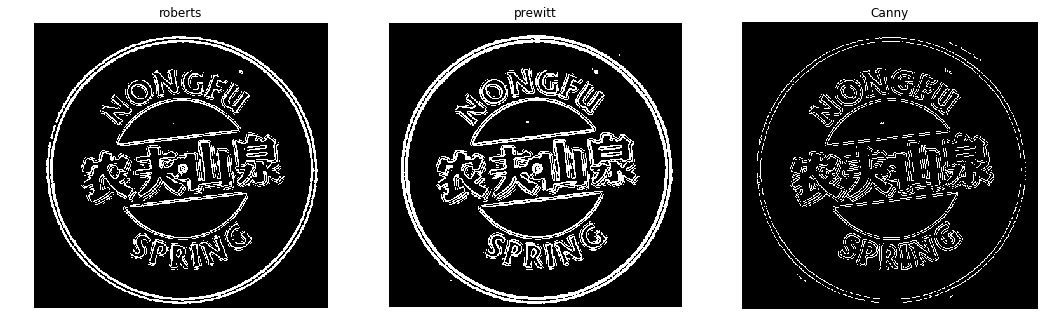

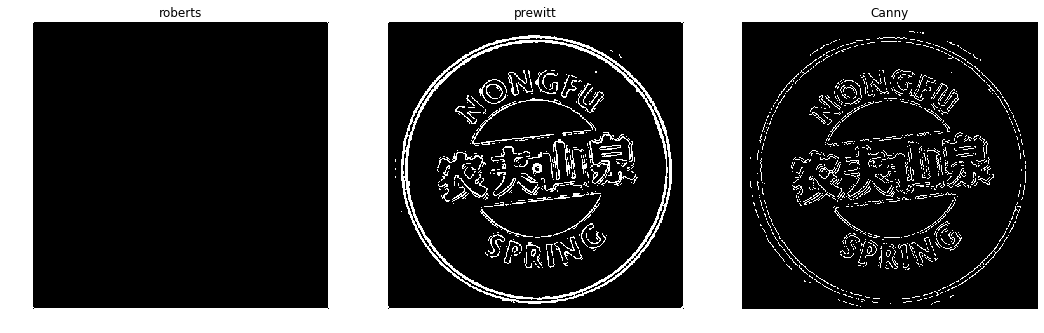

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


def gasuss_noise(image, mean=0, var=0.001):
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    return out


def roberts(img):
    img=np.array(img)
    out=img.copy()
    for i in range(out.shape[0]-1):
        for j in range(out.shape[1]-1):
            template1=np.array([[-1,0],[0,1]])
            template2=np.array([[0,-1],[1,0]])
            out[i,j]=math.sqrt(abs(np.sum(img[i:i+2,j:j+2]*template1))**2+abs(np.sum(img[i:i+2,j:j+2]*template2))**2)
    return cv2.threshold(out, 0, 255, cv2.THRESH_OTSU)[1]


def prewitt(img):
    img=np.array(img)
    out=img.copy()
    for i in range(out.shape[0]-2):
        for j in range(out.shape[1]-2):
            template1=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
            template2=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
            out[i,j]=math.sqrt(abs(np.sum(img[i:i+3,j:j+3]*template1))**2+ abs(np.sum(img[i:i+3,j:j+3]*template2))**2)
    return cv2.threshold(out, 0, 255, cv2.THRESH_OTSU)[1]


def sobel(img):
    img=np.array(img)
    out=img.copy()
    for i in range(out.shape[0]-2):
        for j in range(out.shape[1]-2):
            template1=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
            template2=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
            out[i,j]=math.sqrt(abs(np.sum(img[i:i+3,j:j+3]*template1))**2+abs(np.sum(img[i:i+3,j:j+3]*template2)))
    return cv2.threshold(out, 0, 255, cv2.THRESH_OTSU)[1]

def cv_laplacian(img):
    lap = cv2.Laplacian(img, cv2.CV_16S, ksize=3)  # 算子的大小，必须为1、3、5、7
    laplacian = cv2.convertScaleAbs(lap)  # 转回uint8
    return laplacian

def process(img,a,b):
    rob=roberts(img)
    #aa,contours, hierarchy=cv2.findContours(rob,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    # cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
    # cv2.imshow("img", aa)

    prew=prewitt(img)
    sob = sobel(img)
    #
    lap_img = cv2.Laplacian(img, cv2.CV_16S, ksize=3)
    lap_img = cv2.convertScaleAbs(lap_img)
    Log = cv2.Laplacian(cv2.GaussianBlur(img, (5, 5), 1), cv2.CV_16S, ksize=3)
    Log = cv2.convertScaleAbs(Log)
    # 瓶盖Canny（ 50,80 ）   硬币Canny（ 270, 350 ）
    can = cv2.Canny(img, a,b )

    plt.figure(figsize=(18, 12))
    ax=plt.subplot(231)
    plt.imshow(rob, cmap='gray')
    plt.axis('off')
    ax.set_title("roberts")


    ax=plt.subplot(232)
    plt.imshow(prew, cmap='gray')
    plt.axis('off')
    ax.set_title("prewitt")
    
    ax=plt.subplot(233)
    plt.imshow(can, cmap='gray')
    plt.axis('off')
    ax.set_title("Canny")
    """
    ax=plt.subplot(233)
    plt.imshow(sob, cmap='gray')
    plt.axis('off')
    ax.set_title("sobel")
    ax=plt.subplot(234)
    plt.imshow(lap_img, cmap='gray')
    plt.axis('off')
    ax.set_title("Laplacian")

    ax=plt.subplot(235)
    plt.imshow(Log, cmap='gray')
    plt.axis('off')
    ax.set_title("LoG")

    ax=plt.subplot(236)
    plt.imshow(can, cmap='gray')
    plt.axis('off')
    ax.set_title("Canny")
    """
# 瓶盖Canny（ 50,80 ）   硬币Canny（ 270, 350 ）
#a=cv2.cvtColor(cv2.imread("clock_1.png"), cv2.COLOR_RGB2GRAY)
process(img_1,50, 80)
process(img_1_noise_gas_filter,50, 80)
process(img_1_noise_mid_filter,50, 80)
#process(img_2_noise_gas_filter_nor,270, 350)